<a href="https://colab.research.google.com/github/Buidex/python-basics-info370/blob/master/PS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1 Explore the data

**1. Load the data. You may drop size, lines, and pagenr.**

In [0]:
import pandas as pd
import numpy as np

!wget https://raw.githubusercontent.com/aj-22/IMT370/master/data/texts.csv

data = pd.read_csv(r'/content/texts.csv', sep='\t').sample(2000)

--2020-03-14 22:50:25--  https://raw.githubusercontent.com/aj-22/IMT370/master/data/texts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16476212 (16M) [text/plain]
Saving to: ‘texts.csv’

texts.csv           100%[===================>]  15.71M  33.4MB/s    in 0.5s    

2020-03-14 22:50:27 (33.4 MB/s) - ‘texts.csv’ saved [16476212/16476212]



In [0]:
# Drop some columns
data = data.drop(columns = ["size", "lines", "pagenr"])

**2. Ensure that you don't have any missing name, and empty text in your data**

In [0]:
data.isna().sum()

name    0
text    0
dtype: int64

In [0]:
data = data.dropna()
data.reset_index(drop=True)

,name,text
0,cia-world-factbook-1992,mineral-water bottling\nAgriculture:\n ...
1,cia-world-factbook-1992,(measured from claimed archipelagic baseli...
2,hardy-madding-crowd,"soft, and moist, not yet having stiffened and ..."
3,vaneeden-quest,"""Is that true, really true?"" cried Johannes, a..."
4,cia-world-factbook-1992,"Executive branch:\n British monarch, govern..."
...,...,...
1995,beesly-queen-elizabeth,the sea.\n\nSuch seems to have been the utmost...
1996,webster-early-european-history,"CRUSADE AGAINST THE ALBIGENSES, 1209-1229 A.D...."
1997,hardy-madding-crowd,steed.\nAlthough the road along its greater pa...
1998,why-speech-output,This filter exponentially averages past sample...


In [0]:
# An example of one of the texts in the data set
#data.loc[0]["text"]

**3. Create a summary table where you show how many chunks of each book you have in data. Order
this by size.**

In [0]:
sum_table = data.groupby(["name"]).count()

In [0]:
sum_table = sum_table.sort_values(by="text", ascending=False)
print(sum_table)

                                              text
name                                              
cia-world-factbook-1992                        393
bible                                          209
webster-early-european-history                 185
hardy-madding-crowd                            133
vaneeden-quest                                 123
why-speech-output                              104
unamuno-tragic-sense-of-life                   102
selected-polish-tales                           81
milton-paradise-lost                            79
naval-academy-sound-military-decision           72
eckstein-quintus-claudius                       72
newsgroup                                       66
gordon-quiet-talks-crowned-christ               65
gallienne-quest-of-golden-girl                  49
beesly-queen-elizabeth                          45
workshop-proceedings                            41
balbulus-early-life-charlemagne                 32
shakespeare-as-you-like-it     

**4. Compare books and CS papers text-wise.**

In [0]:
data[data['name']=='webster-early-european-history'].iloc[10]['text']

'\nEFFECTS OF THE DISCOVERIES ON THOUGHT\n\nThe sudden disclosure of oceans, islands, and continents, covering one-\nthird of the globe, worked a revolution in geographical ideas. The earth\nwas found to be far larger than men had supposed it to be, and the\nimagination was stirred by the thought of other amazing discoveries which\nmight be made. From the sixteenth century to the twentieth the work of\nexploration has continued, till now few regions of the world yet remain\nunmapped. At the same time came acquaintance with many strange plants,\nanimals, and peoples, and so scientific knowledge replaced the quaint\nfancies of the Middle Ages.\n\nEFFECTS OF THE DISCOVERIES UPON RELIGION\n\nThe sixteenth century in Europe was the age of that revolt against the\nRoman Church called the Protestant Reformation. During this period,\nhowever, the Church won her victories over the American aborigines. What\nshe lost of territory, wealth, and influence in Europe was more than\noffset by what she

In [0]:
data[data['name']=='paper-compact-hash-tables'].iloc[0]['text']

'J. Computer System Sci.,\nvol. 18, pp143-154, 1979.\n.sp\n.NI "[2]  "\n[4]\\ \\ J.\\ G.\\ Cleary, "Compact hash tables,"\nResearch Report, 82/100/19,\nDepartment of Computer Science, University of Calgary, July 1982.\n.sp\n.NI "[3]  "\n[5]\\ \\ J.\\ G.\\ Cleary, "Random insertion for bidirectional linear probing\ncan be better than optimum," \nResearch Report, 82/105/24,\nDepartment of Computer Science, University of Calgary, September 1982.\n.sp\n.NI "[5]  "\n[6]\\ \\ J. A. Feldman and J. R. Low, "Comment on Brent\'s Scatter Storage \nAlgorithm,"\n.ul\nCACM,\nvol. 16, p703, 1973.\n.sp\n.NI "[7]  "\n[7]\\ \\ G. D. Knott, "Hashing functions,"'

From the two samples above - the first one being a history book, and the second one being a paper on data structures - we can see a few similarities between them. They both contain many "\n", which represent a line break. We also see a variety of symbols such as '$', '\t', '_', etc. The formatting of these texts show some differences though, which is expected due to the different types of information presented by history books and papers on programming.

##2. First Task: Tokenize

**1. convert all texts to lower case**

In [0]:
data["text"] = data["text"].str.lower()

In [0]:
data["text"]

2640         mineral-water bottling\nagriculture:\n    ...
4019         (measured from claimed archipelagic baseli...
6248     soft, and moist, not yet having stiffened and ...
9879     "is that true, really true?" cried johannes, a...
4363     executive branch:\n    british monarch, govern...
                               ...                        
414      the sea.\n\nsuch seems to have been the utmost...
11786    crusade against the albigenses, 1209-1229 a.d....
6408     steed.\nalthough the road along its greater pa...
12266    this filter exponentially averages past sample...
4366         fishing, tourism, offshore financial servi...
Name: text, Length: 2000, dtype: object

**2. remove punctuation and other weird characters. I recommend to replace these with space. This is
to be done in order to make the code to recognize strings like "end" and "end." as the same word.**

https://stackoverflow.com/questions/42882019/trying-to-remove-punctuations-from-a-column-in-pandas

In [0]:
data["text"] = data["text"].str.replace("[^\w\s]", " ", regex = True)

In [0]:
data["text"]

2640         mineral water bottling\nagriculture \n    ...
4019          measured from claimed archipelagic baseli...
6248     soft  and moist  not yet having stiffened and ...
9879      is that true  really true   cried johannes  a...
4363     executive branch \n    british monarch  govern...
                               ...                        
414      the sea \n\nsuch seems to have been the utmost...
11786    crusade against the albigenses  1209 1229 a d ...
6408     steed \nalthough the road along its greater pa...
12266    this filter exponentially averages past sample...
4366         fishing  tourism  offshore financial servi...
Name: text, Length: 2000, dtype: object

**3. tokenize texts to words. If you replaced punctuation with spaces, you can just use pandas' str.split
method.
As a result your data should still contain the same texts, but instead of a long text string, the
individual texts should be lists of tokens.**

In [0]:
data["text"] = data["text"].str.split()
data["text"]

2640     [mineral, water, bottling, agriculture, accoun...
4019     [measured, from, claimed, archipelagic, baseli...
6248     [soft, and, moist, not, yet, having, stiffened...
9879     [is, that, true, really, true, cried, johannes...
4363     [executive, branch, british, monarch, governor...
                               ...                        
414      [the, sea, such, seems, to, have, been, the, u...
11786    [crusade, against, the, albigenses, 1209, 1229...
6408     [steed, although, the, road, along, its, great...
12266    [this, filter, exponentially, averages, past, ...
4366     [fishing, tourism, offshore, financial, servic...
Name: text, Length: 2000, dtype: object

**4. remove stopwords. It is up to you to decide which stopwords to remove, I recommend to include at
least the and a.**

In [0]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stop.remove("the")
stop.remove("a")

In [0]:
data["text"].apply(lambda x: [token for token in x if token not in stop])

2640     [mineral, water, bottling, agriculture, accoun...
4019     [measured, claimed, archipelagic, baselines, e...
6248     [soft, moist, yet, stiffened, darkened, summer...
9879     [true, really, true, cried, johannes, thought,...
4363     [executive, branch, british, monarch, governor...
                               ...                        
414      [the, sea, seems, the, utmost, success, the, f...
11786    [crusade, the, albigenses, 1209, 1229, a, the,...
6408     [steed, although, the, road, along, greater, p...
12266    [filter, exponentially, averages, past, sample...
4366     [fishing, tourism, offshore, financial, servic...
Name: text, Length: 2000, dtype: object

**5. Create such vocabulary and order it alphabetically.**

In [0]:
#vocab = set(data["text"].values)
all_tokens = data.iloc[:,1].values
vocab = set()
for tokens in all_tokens:
  vocab = vocab.union(set(tokens))

print (vocab)

{'judea', 'woes', 'differing', 'lodgings', 'finding', 'fefellerunt_', 'buoyant', 'weepeth', 'glorioso', 'misc', 'parma', 'disunited', 'limitation', 'infrequent', 'terraces', 'irreversible', 'faraday', 'verify', 'sails', 'lahours', 'prompt', 'pascua', 'shelter', 'ainsworth', 'benin', '539', 'gera', '137', 'impatient', 'internal', 'hebron', 'domestick', 'philistine', 'harsha', 'relationships', 'charybdis', 'merest', 'spliced', '1558', 'camest', '627', '²⁸', 'slightly', 'similarly', 'quickly_', 'pattens', 'fia', 'exclaims', 'herod', 'massa', 'recollecting', 'shekels', 'capricious', 'indignities', 'guerrilla', 'lm', 'visionaries', 'devolve', '_rhoecus_', 'lfcs', 'legalized', 'wishing', 'no', 'decline', 'lives', 'beasts', 'grieving', 'hymn', 'songkhram', 'impertinence', 'jeziel', 'universities', 'disposed', 'linguist', 'witnessing', 'artemis3', 'rose_', 'spoon', 'stateliest', 'asiatics', 'launch', 'senyavin', 'berry', 'makatea', 'recompensed', 'continuation', 'awe', 'brick', 'pak', 'bulwark

In [0]:
sorted_vocab = sorted(vocab)

In [0]:
print (sorted_vocab)

['0', '00', '000', '0000', '00000', '0001', '0008', '00140', '01', '0100', '0107', '011', '012', '013', '018', '02', '020', '021', '022', '023', '025', '026', '0285', '03', '030', '033', '0350', '036', '04', '040', '041', '0430', '0437', '044', '0440', '045', '047', '048', '049', '05', '050', '0500', '052', '054', '055', '0550', '056', '058', '06', '060', '0600', '061', '063', '064', '0656', '066', '067', '068', '069', '06g', '07', '070', '0700', '073', '075', '078', '079', '08', '080', '082', '083', '086', '087', '088', '089', '09', '090', '0900', '092', '09213', '093', '094', '095', '096', '09613', '09624', '09718', '09723', '09813', '09862', '099', '0i', '1', '10', '100', '1000', '10006', '1001', '10017', '1006', '1009', '101', '102', '1024', '103', '1030', '104', '1046', '105', '1054', '10553', '1058', '106', '1063', '1066', '107', '1070', '108', '109', '1090', '1095', '10r4', '10th', '11', '110', '1100', '111', '1110', '1113', '1114', '112', '1122', '113', '114', '115', '1151', '1

##3. Second and the Largest Task: Implement BOW

In [0]:
#Transform text from array of lists to array of strings. 
data["text"] = [' '.join(map(str, l)) for l in data['text']]
data

,name,text
2640,cia-world-factbook-1992,mineral water bottling agriculture accounts fo...
4019,cia-world-factbook-1992,measured from claimed archipelagic baselines e...
6248,hardy-madding-crowd,soft and moist not yet having stiffened and da...
9879,vaneeden-quest,is that true really true cried johannes as he ...
4363,cia-world-factbook-1992,executive branch british monarch governor exec...
...,...,...
414,beesly-queen-elizabeth,the sea such seems to have been the utmost suc...
11786,webster-early-european-history,crusade against the albigenses 1209 1229 a d t...
6408,hardy-madding-crowd,steed although the road along its greater part...
12266,why-speech-output,this filter exponentially averages past sample...


In [0]:
data["text"]
data["name"].unique

<bound method Series.unique of 2640            cia-world-factbook-1992
4019            cia-world-factbook-1992
6248                hardy-madding-crowd
9879                     vaneeden-quest
4363            cia-world-factbook-1992
                      ...              
414              beesly-queen-elizabeth
11786    webster-early-european-history
6408                hardy-madding-crowd
12266                 why-speech-output
4366            cia-world-factbook-1992
Name: name, Length: 2000, dtype: object>

In [0]:
#Create a data frame of zeros with column names equal to the vocabulary and as many rows as you have texts.
from sklearn.feature_extraction.text import CountVectorizer
vrizer = CountVectorizer()
r = vrizer.fit(data["text"])
X = vrizer.transform(data["text"]).astype("float32").toarray()
BOW = pd.DataFrame(X, index=data["name"], columns=vrizer.get_feature_names())
BOW.head(5)

,00,000,0000,00000,0001,0008,00140,01,0100,0107,011,012,013,018,02,020,021,022,023,025,026,0285,03,030,033,0350,036,04,040,041,0430,0437,044,0440,045,047,048,049,05,050,...,²⁶,²⁷,²⁸,³⁴,³⁵,³⁶,³⁷,³⁸,³⁹,¹²,¹³,¹¹,¹⁰,¹⁵,æduans,æternitatis,çebäôth,μεταπόντιον,νέα,παλαίπαφος,πάφος,πίνδαρος,⁴²,⁴³,⁴¹,⁴⁰,⁵³,⁶²,⁶³,⁶¹,⁶⁴,⁶⁵,⁶⁹,⁸⁵,⁸⁶,⁸⁷,⁸⁸,⁸⁹,⁹³,⁹⁰
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cia-world-factbook-1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cia-world-factbook-1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hardy-madding-crowd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vaneeden-quest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cia-world-factbook-1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# BOW with texts-test.csv

!wget 'https://raw.githubusercontent.com/guoz24/PS7/master/texts-test.csv.bz2'
t_data = pd.read_csv(r'/content/texts-test.csv.bz2', sep='\t')
t_data.head()

--2020-03-14 22:50:36--  https://raw.githubusercontent.com/guoz24/PS7/master/texts-test.csv.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204 [application/octet-stream]
Saving to: ‘texts-test.csv.bz2’

texts-test.csv.bz2  100%[===================>]     204  --.-KB/s    in 0s      

2020-03-14 22:50:36 (64.6 MB/s) - ‘texts-test.csv.bz2’ saved [204/204]



,name,size,lines,pagenr,text
0,laozi,1,1,1,"Knowing others is, knowing yourself is"
1,laozi,1,1,2,Mastering others is strength. Mastering yourse...
2,so,1,1,1,I tried using L.index() the mastering the
3,so,1,1,2,I tried running loop L using L.index(R)


In [0]:
t_data = t_data.drop(columns = ["size", "lines", "pagenr"])
t_data.head(5)

,name,text
0,laozi,"Knowing others is, knowing yourself is"
1,laozi,Mastering others is strength. Mastering yourse...
2,so,I tried using L.index() the mastering the
3,so,I tried running loop L using L.index(R)


In [0]:
# CountVectorizer and BOW once again!

# We apply the following token_pattern to include 1-letter words in our bag of words.
 # Source: https://stackoverflow.com/questions/43601358/empty-vocabulary-for-single-letter-by-countvectorizer
vrizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
r = vrizer.fit(t_data['text'])
X = vrizer.transform(t_data['text'])
# BOW for the data set above
BOW_test = pd.DataFrame(X.astype("float32").toarray(), columns=vrizer.get_feature_names())
print(f'df shape: {BOW_test.shape}')
BOW_test.head()

df shape: (4, 15)


,i,index,is,knowing,l,loop,mastering,others,r,running,strength,the,tried,using,yourself
0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


##4. Model

Now the fun part. Your task is to categorize the texts using k-NN. Split the data into training-validation parts, use training to fit your k-NN, and validation to compute accuracy. Experiment with different k and
different distance metrics.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Split your data into training/testing chunks. Remember: BOW is your data matrix (design matrix) and name is your target variable.

In [0]:
X = BOW.values
y = BOW.index.values
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y, test_size=0.2)
print(f'Xtrain.shape: {Xtrain.shape} and Ytrain.shape: {Ytrain.shape}')

Xtrain.shape: (1600, 27779) and Ytrain.shape: (1600,)


Pick a K and use cosine similarity.

In [0]:
k = 3
model = KNeighborsClassifier(n_neighbors=k, metric = 'cosine')
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# Fitting the model on the training data
m_fit = model.fit(Xtrain, Ytrain)

In [0]:
yhatV_BOW = m_fit.predict(Xval)
converted_yhat_BOW = yhatV_BOW == Yval
converted_yhat_BOW

array([ True, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

**Compute Accuracy on validation** 

In [0]:
accuracy = converted_yhat_BOW.mean()
print(f'The accuracy is: {accuracy}')

The accuracy is: 0.52


**Trying different k-s, and different metrics**

In [0]:
def computeAccuracy(X, y, k, m):
  Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = .2)
  model = KNeighborsClassifier(k, metric = m)
  m_train = model.fit(Xtrain, ytrain)
  yhat_valid = m_train.predict(Xval)
  convert_yhat = yhat_valid == yval
  accuracy = convert_yhat.mean()
  return accuracy

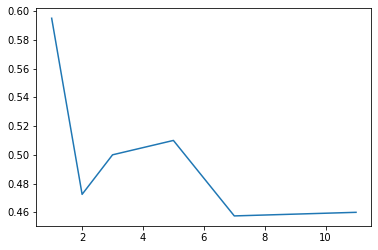

In [0]:
klist = [1,2,3,5,7,11]
accuracy = pd.Series(0, index = klist, dtype=float)
for k in klist:
  a = computeAccuracy(X, y, k, 'cosine')
  accuracy[k] = a

plt.plot(klist, accuracy)

4.7 - Check 5.4

##5 - TF-IDF transformation

5.1 - Let's first implement the TF-IDF transformation to the tiny test dataset to confirm our calculations

In [0]:
tf = np.log(1 + XTiny)
idf = np.log(len(XTiny)/(1 + (XTiny > 0).sum(axis=0)))
tfidf = np.round(tf*idf, 3)
tfidf

NameError: ignored

We got basically the same output as the one from the homework pdf, so let's keep going! Let's get the TF-IDF transformation of the large data set and repeat steps from part 4 and then compare the results.

In [0]:
X = BOW.values
y = BOW.index.values

tf = np.log(1 + X)
idf = np.log(len(X)/(1 + (X > 0).sum(axis=0)))
tfidf = np.round(tf*idf, 3)
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
Xtrain, Xval, Ytrain, Yval = train_test_split(tfidf, y, test_size=0.2)
print(f'Xtrain.shape: {Xtrain.shape} and Ytrain.shape: {Ytrain.shape}')

Xtrain.shape: (1600, 27779) and Ytrain.shape: (1600,)


In [0]:
# Starting with a single 'k'
k = 3
model = KNeighborsClassifier(n_neighbors=k, metric = 'cosine')
# Fitting the model on the training data
m_fit = model.fit(Xtrain, Ytrain)

In [0]:
yhatV_tfidf = m_fit.predict(Xval)
converted_yhat_tfidf = yhatV_tfidf == Yval
converted_yhat_tfidf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

**Computing the accuracy:**

In [0]:
accuracy = converted_yhat_tfidf.mean()
print(f'The accuracy is: {accuracy}')

The accuracy is: 0.885


**Different k-s, and metrics**

In [0]:
def computeAccuracy(tfidf, y, k, m):
  Xtrain, Xval, ytrain, yval = train_test_split(tfidf, y, test_size = .2)
  model = KNeighborsClassifier(k, metric = m)
  m_train = model.fit(Xtrain, ytrain)
  yhat_valid = m_train.predict(Xval)
  convert_yhat = yhat_valid == yval
  accuracy = convert_yhat.mean()
  return accuracy

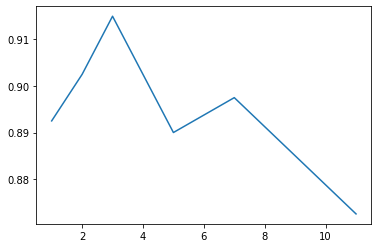

In [0]:
klist = [1,2,3,5,7,11]
accuracy = pd.Series(0, index = klist, dtype=float)
for k in klist:
  a = computeAccuracy(tfidf, y, k, 'cosine')
  accuracy[k] = a

plt.plot(klist, accuracy)

**5-3** - Comparing BOW and TF-IDF results

Comparing both plots, we can see the major difference between using both techniques. The accuracy for the Bag of Words is **not greater** than 60% for any 'k' value less than 11. On the other hand, the accuracy for TF-IDF is **not less** than 85% for any 'k' value less than 11.

In general, for any 'k' value chosen, TF-IDF provides better accuracy on the prediction KNeighborsClassifier model than BOW.

**5-4** - Printing out some correct and incorrect predictions and analyzing them


In [0]:
print ("Incorrect Predictions")
incorrects_tfidf = dict((key, 0) for key in Yval)
for i in range(len(yhatV_tfidf)):
  if (Yval[i] != yhatV_tfidf[i]):
    print ("Original:", Yval[i], "---->", "Prediction:", yhatV_tfidf[i])
    incorrects_tfidf[Yval[i]] += 1


Incorrect Predictions
Original: hardy-madding-crowd ----> Prediction: carroll-alice-wonderland
Original: karn-snowflakes ----> Prediction: bible
Original: eckstein-quintus-claudius ----> Prediction: webster-early-european-history
Original: unamuno-tragic-sense-of-life ----> Prediction: naval-academy-sound-military-decision
Original: balbulus-early-life-charlemagne ----> Prediction: bible
Original: selected-polish-tales ----> Prediction: bible
Original: eckstein-quintus-claudius ----> Prediction: bible
Original: eckstein-quintus-claudius ----> Prediction: bible
Original: beesly-queen-elizabeth ----> Prediction: webster-early-european-history
Original: paper-data-compression ----> Prediction: infiltrating-open-systems
Original: balbulus-early-life-charlemagne ----> Prediction: webster-early-european-history
Original: milton-paradise-lost ----> Prediction: bible
Original: milton-paradise-lost ----> Prediction: hardy-madding-crowd
Original: paper-logical-implementation-of-arithmetic ----> 

In [0]:
print ("Correct Predictions")
corrects_tfidf = dict((key, 0) for key in Yval)
for i in range(len(yhatV_tfidf)):
  if (Yval[i] == yhatV_tfidf[i]):
    print ("Original:", Yval[i], "---->", "Prediction:", yhatV_tfidf[i])
    corrects_tfidf[Yval[i]] += 1


Correct Predictions
Original: cia-world-factbook-1992 ----> Prediction: cia-world-factbook-1992
Original: cia-world-factbook-1992 ----> Prediction: cia-world-factbook-1992
Original: why-speech-output ----> Prediction: why-speech-output
Original: cia-world-factbook-1992 ----> Prediction: cia-world-factbook-1992
Original: gordon-quiet-talks-crowned-christ ----> Prediction: gordon-quiet-talks-crowned-christ
Original: beesly-queen-elizabeth ----> Prediction: beesly-queen-elizabeth
Original: webster-early-european-history ----> Prediction: webster-early-european-history
Original: vaneeden-quest ----> Prediction: vaneeden-quest
Original: hardy-madding-crowd ----> Prediction: hardy-madding-crowd
Original: bible ----> Prediction: bible
Original: beesly-queen-elizabeth ----> Prediction: beesly-queen-elizabeth
Original: bible ----> Prediction: bible
Original: hardy-madding-crowd ----> Prediction: hardy-madding-crowd
Original: vaneeden-quest ----> Prediction: vaneeden-quest
Original: cia-world-fa

In [0]:
for key in incorrects_tfidf.keys():
  print (key, "-----> Corrects:", corrects_tfidf[key], "Incorrects:", incorrects_tfidf[key])

cia-world-factbook-1992 -----> Corrects: 92 Incorrects: 0
why-speech-output -----> Corrects: 20 Incorrects: 0
gordon-quiet-talks-crowned-christ -----> Corrects: 13 Incorrects: 2
beesly-queen-elizabeth -----> Corrects: 6 Incorrects: 2
webster-early-european-history -----> Corrects: 28 Incorrects: 6
vaneeden-quest -----> Corrects: 24 Incorrects: 1
hardy-madding-crowd -----> Corrects: 25 Incorrects: 3
bible -----> Corrects: 42 Incorrects: 0
karn-snowflakes -----> Corrects: 0 Incorrects: 2
eckstein-quintus-claudius -----> Corrects: 11 Incorrects: 6
unamuno-tragic-sense-of-life -----> Corrects: 12 Incorrects: 4
selected-polish-tales -----> Corrects: 12 Incorrects: 1
milton-paradise-lost -----> Corrects: 10 Incorrects: 9
gallienne-quest-of-golden-girl -----> Corrects: 8 Incorrects: 1
newsgroup -----> Corrects: 7 Incorrects: 3
paper-search-for-autonomy -----> Corrects: 2 Incorrects: 1
balbulus-early-life-charlemagne -----> Corrects: 5 Incorrects: 3
naval-academy-sound-military-decision ----->

The model performed the best on "cia-world-factbook-1992" with 92 corrects and 0 incorrects, 100% accuracy. The model performed worst on "milton-paraides-lost" with 10 corrects and 9 incorrects, 53% accuracy. The model only made 10 incorrect predictions on texts with 20 or more entries, while making 36 incorrect predictions on texts with less than 20 entries. We can conclude there is a positive correlation between the number of entries that exists in the data for a specific text, and the performance of the model on that text (more data -> better predictions). 